<a href="https://colab.research.google.com/github/James-McNeill/TimeSeriesAnalysis/blob/main/TimeSeriesFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series

Building functions to make life easier

1. Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Seaborn style
sns.set(rc={'figure.figsize':(30,12)})
sns.set_style("darkgrid")

In [ ]:
# Reading files within a directory
import os
path = os.getcwd()
print(path)

/content


In [ ]:
# Change the work directory
os.chdir('/content/drive/My Drive/Data')
print(os.getcwd())

/content/drive/My Drive/Data


In [ ]:
# Display files within this directory
for dirname, _, filenames in os.walk(os.getcwd()):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/drive/My Drive/Data/covid_19_data.gsheet
/content/drive/My Drive/Data/fire_archive_M6_96619.gsheet
/content/drive/My Drive/Data/New_York_City_.png
/content/drive/My Drive/Data/AB_NYC_2019.csv
/content/drive/My Drive/Data/est_hourly.paruqet.zip
/content/drive/My Drive/Data/est_hourly.paruqet
/content/drive/My Drive/Data/vehicles.csv
/content/drive/My Drive/Data/seattle-weather.csv
/content/drive/My Drive/Data/WA_Fn-UseC_-HR-Employee-Attrition.csv
/content/drive/My Drive/Data/Life Expectancy Data.csv
/content/drive/My Drive/Data/PPR-2021-01.xlsx
/content/drive/My Drive/Data/DailyDelhiClimateTrain.csv


In [ ]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# Add the date to the index
df = df[['date','humidity']]
df.index = pd.to_datetime(df['date'])
df = df.drop(['date'],axis=1)

In [ ]:
# Visualisation with a slider
import plotly.express as px
fig = px.line(df, x=df.index, y='humidity', title='Humidity with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
# Test for stationarity
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['humidity'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')


# KPSS Test
stats, p, lags, critical_values = kpss(df['humidity'], 'ct')
print(f'KPSS Test Statistics: {stats}')
print(f'p-value: {p}')

if p<0.05:
      print('Series is not Stationary')
else:
      print('Series is Stationary')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



ADF Statistic: -3.675576919163339
p-value: 0.004470100478130758
Series is Stationary
KPSS Test Statistics: 0.06251203730075192
p-value: 0.1
Series is Stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



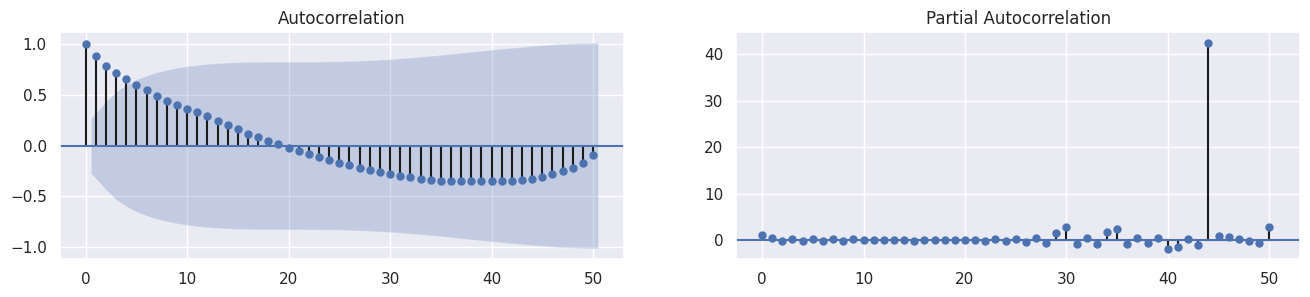

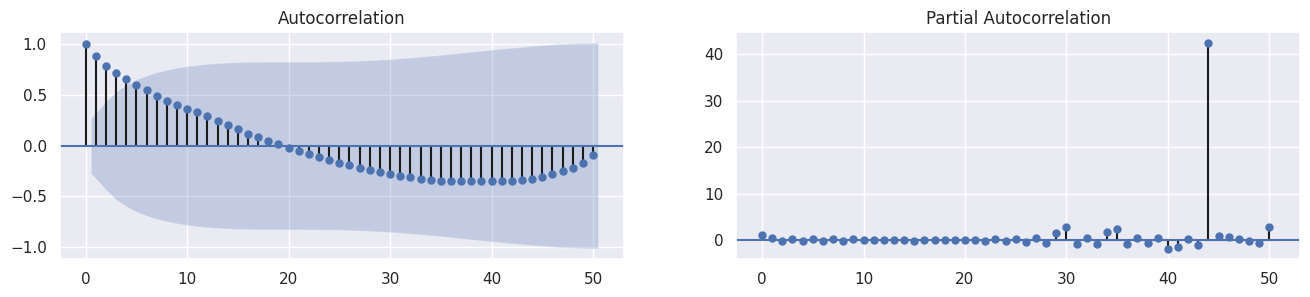

In [ ]:
# Autocorrelation testing
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Calculate ACF and PACF upto 50 lags
acf_50 = acf(df['humidity'], nlags=50)
pacf_50 = pacf(df['humidity'], nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(acf_50, lags=50, ax=axes[0])
plot_pacf(pacf_50, lags=50, ax=axes[1])

Text(0.5, 0.98, 'Additive Decompose')

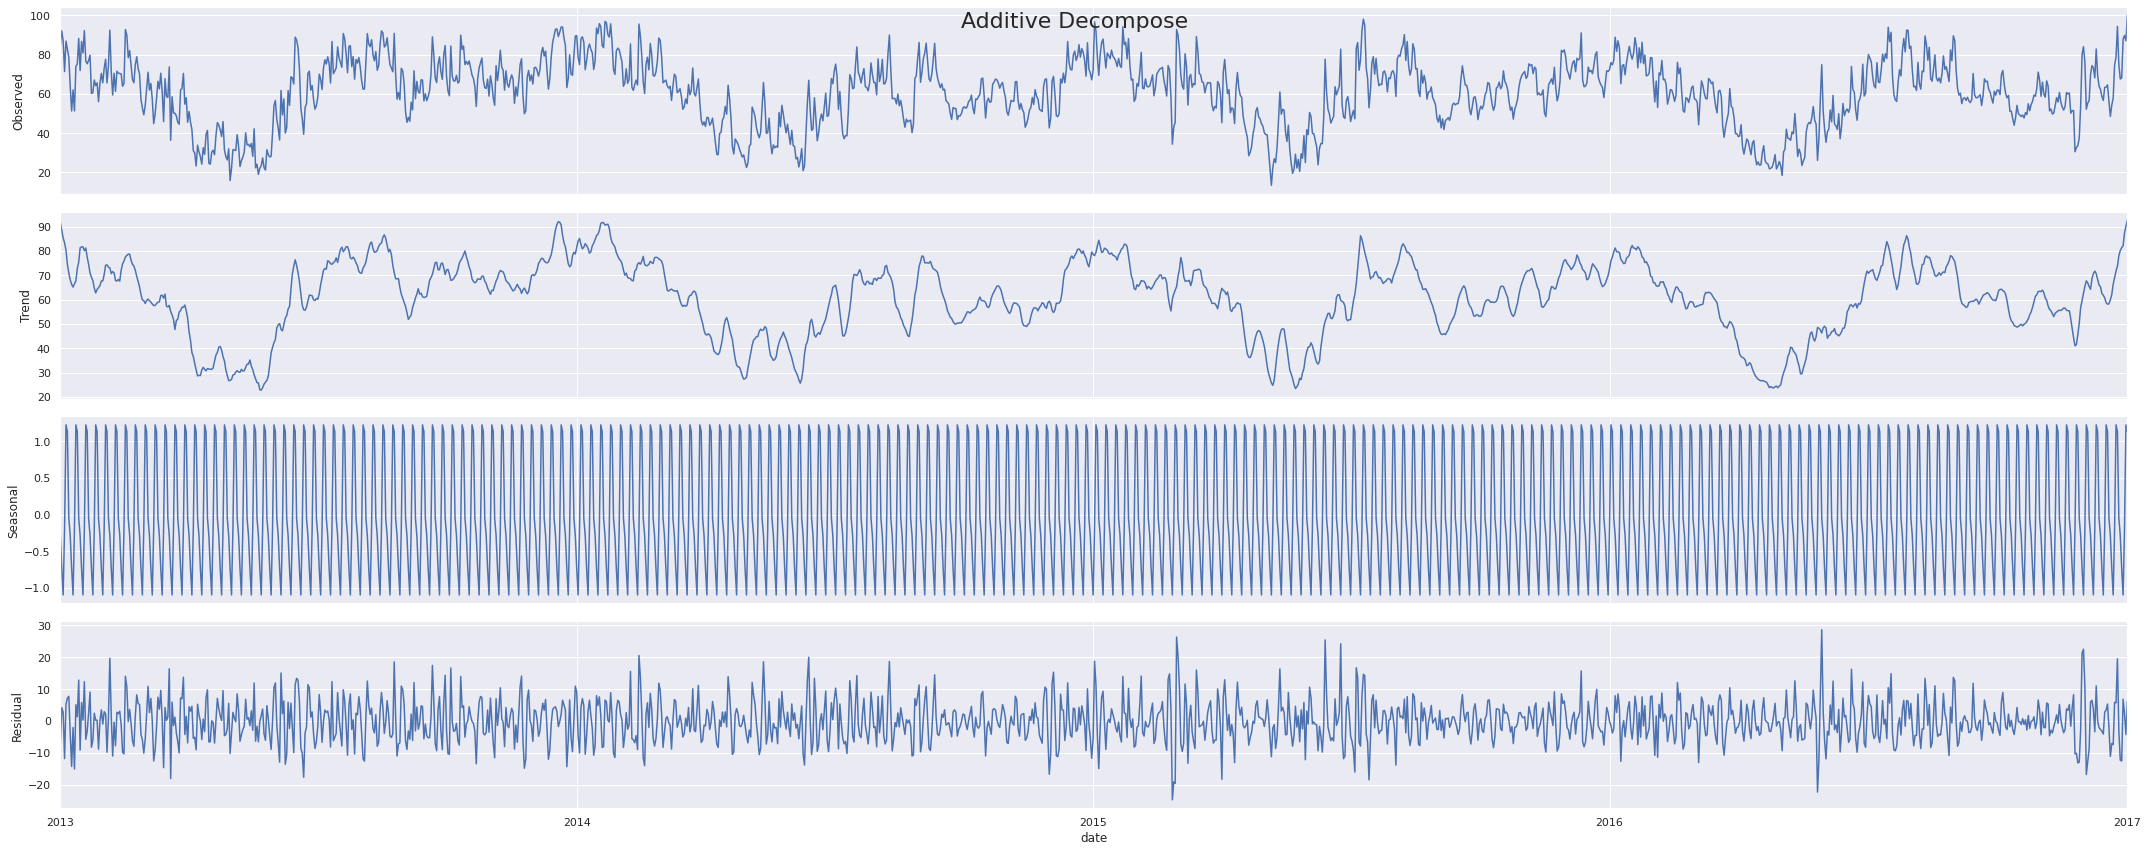

In [ ]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Additive Decomposition
result_add = seasonal_decompose(df['humidity'], model='additive', extrapolate_trend='freq')
# Plot
result_add.plot().suptitle('Additive Decompose', fontsize=22)